In [1]:

import math
import ipywidgets as widgets
import numpy as np
import copy
import random

import pickle

import datetime


import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

import scipy.integrate as integrate

In [7]:
with open('rumor_vars_231013034310.pkl', 'rb') as f:
    variables_list=pickle.load(f)

all_results, graph_type_to_test, centrality_type_to_test, tmax, n_list,p_list,target_infected_ratio_list,repeat_num=variables_list

In [9]:
print(graph_type_to_test, centrality_type_to_test, tmax, n_list,p_list,target_infected_ratio_list,repeat_num,sep='\n')

['ER']
['pseudo_leaf', 'rumor_centrality', 'closeness_centrality']
25
[50, 100, 150, 200, 250, 300]
[0.04]
[0.1, 0.2, 0.3]
500


In [10]:
all_results[graph_type_to_test[0]][centrality_type_to_test[0]]["zero_error_rate"]
all_results[graph_type_to_test[0]][centrality_type_to_test[0]]["one_hop_error_rate"]
all_results[graph_type_to_test[0]][centrality_type_to_test[0]]["ave_error_hops_list"]
all_results[graph_type_to_test[0]][centrality_type_to_test[0]]["std_error_hops_list"]
all_results[graph_type_to_test[0]][centrality_type_to_test[0]]["ave_pairwise_average_dist_list"]


array([[[0.268     , 0.22653061, 0.18089431]],

       [[0.302     , 0.2       , 0.18473896]],

       [[0.292     , 0.236     , 0.16297787]],

       [[0.362     , 0.228     , 0.184     ]],

       [[0.3006012 , 0.202     , 0.128     ]],

       [[0.3747495 , 0.184     , 0.114     ]]])

In [54]:
all_results[graph_type_to_test[0]][centrality_type_to_test[0]]["one_hop_error_rate"][:,0,:]

array([[0.858     , 0.65102041, 0.59756098],
       [0.716     , 0.59      , 0.52610442],
       [0.806     , 0.66      , 0.54929577],
       [0.822     , 0.644     , 0.52      ],
       [0.79358717, 0.61      , 0.442     ],
       [0.78957916, 0.552     , 0.39      ]])

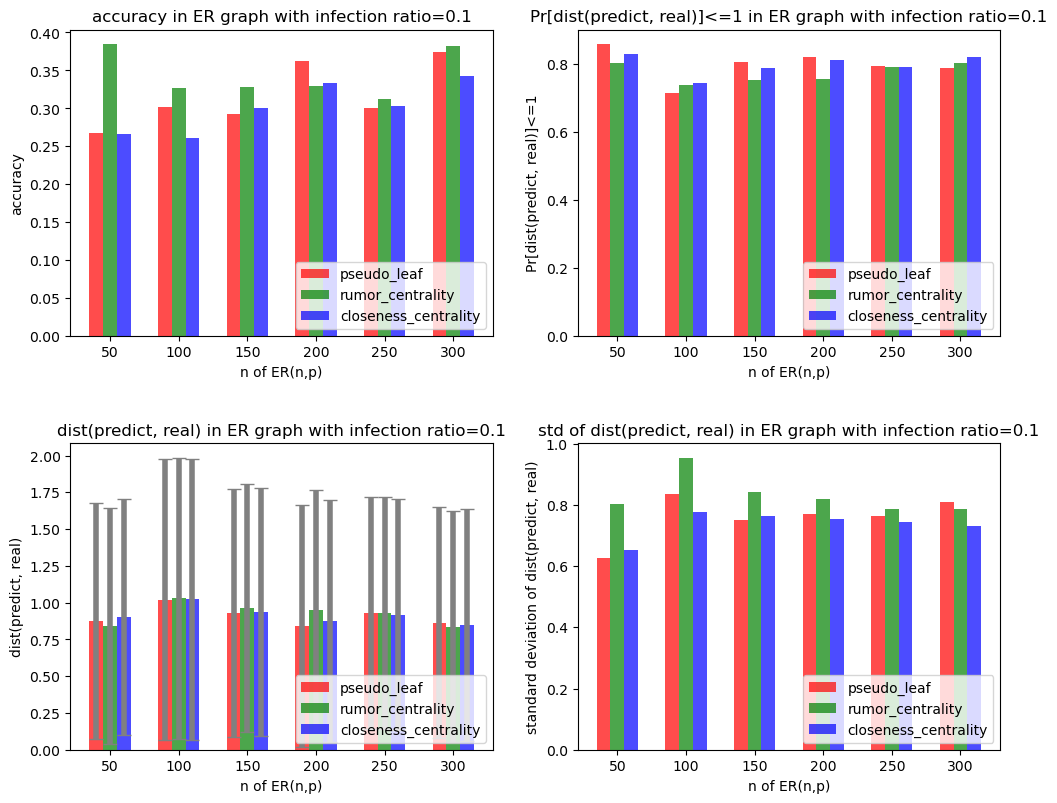

In [48]:
j=0


width=10
error_params=dict(elinewidth=4,ecolor='gray',capsize=5)


fig, axs = plt.subplots(2,2,figsize=(12, 9))
axs[0,0].bar(np.array(n_list)-width, all_results[graph_type_to_test[0]][centrality_type_to_test[0]]["zero_error_rate"][:,0,j],alpha=0.7, width=width, color='r',label=centrality_type_to_test[0])
axs[0,0].bar(np.array(n_list), all_results[graph_type_to_test[0]][centrality_type_to_test[1]]["zero_error_rate"][:,0,j],alpha=0.7, width=width, color='g',label=centrality_type_to_test[1])
axs[0,0].bar(np.array(n_list)+width, all_results[graph_type_to_test[0]][centrality_type_to_test[2]]["zero_error_rate"][:,0,j],alpha=0.7, width=width, color='b',label=centrality_type_to_test[2])
axs[0,0].legend(loc='lower right')
axs[0,0].set_title('accuracy in ER graph with infection ratio='+str(target_infected_ratio_list[j]))
axs[0,0].set_xlabel('n of ER(n,p)')
axs[0,0].set_ylabel('accuracy')

axs[0,1].bar(np.array(n_list)-width, all_results[graph_type_to_test[0]][centrality_type_to_test[0]]["one_hop_error_rate"][:,0,j],alpha=0.7, width=width, color='r',label=centrality_type_to_test[0])
axs[0,1].bar(np.array(n_list), all_results[graph_type_to_test[0]][centrality_type_to_test[1]]["one_hop_error_rate"][:,0,j],alpha=0.7, width=width, color='g',label=centrality_type_to_test[1])
axs[0,1].bar(np.array(n_list)+width, all_results[graph_type_to_test[0]][centrality_type_to_test[2]]["one_hop_error_rate"][:,0,j],alpha=0.7, width=width, color='b',label=centrality_type_to_test[2])
axs[0,1].legend(loc='lower right')
axs[0,1].set_title('Pr[dist(predict, real)]<=1 in ER graph with infection ratio='+str(target_infected_ratio_list[j]))
axs[0,1].set_xlabel('n of ER(n,p)')
axs[0,1].set_ylabel('Pr[dist(predict, real)]<=1')

axs[1,0].bar(np.array(n_list)-width, all_results[graph_type_to_test[0]][centrality_type_to_test[0]]["ave_error_hops_list"][:,0,j],alpha=0.7, width=width, color='r',yerr=all_results[graph_type_to_test[0]][centrality_type_to_test[1]]["std_error_hops_list"][:,0,j],error_kw=error_params, label=centrality_type_to_test[0])
axs[1,0].bar(np.array(n_list), all_results[graph_type_to_test[0]][centrality_type_to_test[1]]["ave_error_hops_list"][:,0,j],alpha=0.7, width=width, color='g',yerr=all_results[graph_type_to_test[0]][centrality_type_to_test[1]]["std_error_hops_list"][:,0,j],error_kw=error_params, label=centrality_type_to_test[1])
axs[1,0].bar(np.array(n_list)+width, all_results[graph_type_to_test[0]][centrality_type_to_test[2]]["ave_error_hops_list"][:,0,j],alpha=0.7, width=width, color='b',yerr=all_results[graph_type_to_test[0]][centrality_type_to_test[1]]["std_error_hops_list"][:,0,j],error_kw=error_params, label=centrality_type_to_test[2])
axs[1,0].legend(loc='lower right')
axs[1,0].set_title('dist(predict, real) in ER graph with infection ratio='+str(target_infected_ratio_list[j]))
axs[1,0].set_xlabel('n of ER(n,p)')
axs[1,0].set_ylabel('dist(predict, real)')

axs[1,1].bar(np.array(n_list)-width, all_results[graph_type_to_test[0]][centrality_type_to_test[0]]["std_error_hops_list"][:,0,j],alpha=0.7, width=width, color='r',label=centrality_type_to_test[0])
axs[1,1].bar(np.array(n_list), all_results[graph_type_to_test[0]][centrality_type_to_test[1]]["std_error_hops_list"][:,0,j],alpha=0.7, width=width, color='g',label=centrality_type_to_test[1])
axs[1,1].bar(np.array(n_list)+width, all_results[graph_type_to_test[0]][centrality_type_to_test[2]]["std_error_hops_list"][:,0,j],alpha=0.7, width=width, color='b',label=centrality_type_to_test[2])
axs[1,1].legend(loc='lower right')
axs[1,1].set_title('std of dist(predict, real) in ER graph with infection ratio='+str(target_infected_ratio_list[j]))
axs[1,1].set_xlabel('n of ER(n,p)')
axs[1,1].set_ylabel('standard deviation of dist(predict, real)')


plt.subplots_adjust(left=0.125,bottom=0.1, right=0.9,top=0.9,wspace=0.2,hspace=0.35)

plt.show()

In [49]:
fmt_list=['r--','g--','b--','c--','m--','y--']
point_fmt_list=['ro-','g+-','b^-', 'co-','m+-','y^-']

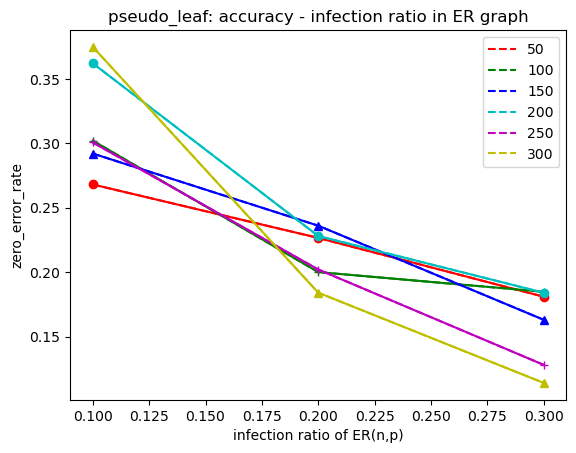

In [58]:
fig=plt.figure()
for i in range(len(n_list)):
    plt.plot(target_infected_ratio_list,all_results[graph_type_to_test[0]][centrality_type_to_test[0]]["zero_error_rate"][i,0,:],fmt_list[i],label=str(n_list[i]))
    plt.plot(target_infected_ratio_list,all_results[graph_type_to_test[0]][centrality_type_to_test[0]]["zero_error_rate"][i,0,:],point_fmt_list[i])
plt.title(centrality_type_to_test[0]+ ': accuracy - infection ratio ' + 'in ER graph')
# plt.text(0.02,0.3,'')
plt.xlabel('infection ratio of ER(n,p)')
plt.ylabel('zero_error_rate')
plt.legend()
plt.show()

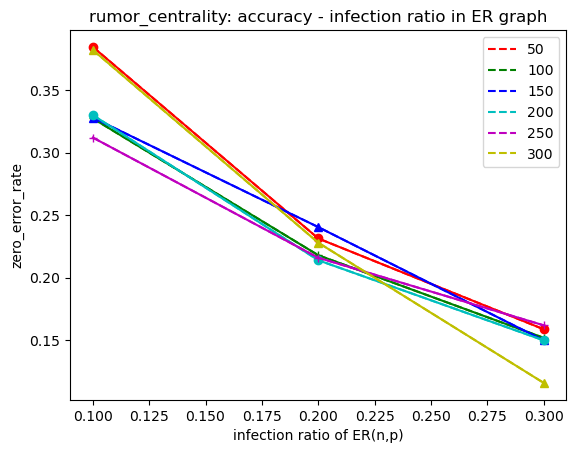

In [59]:
fig=plt.figure()
for i in range(len(n_list)):
    plt.plot(target_infected_ratio_list,all_results[graph_type_to_test[0]][centrality_type_to_test[1]]["zero_error_rate"][i,0,:],fmt_list[i],label=str(n_list[i]))
    plt.plot(target_infected_ratio_list,all_results[graph_type_to_test[0]][centrality_type_to_test[1]]["zero_error_rate"][i,0,:],point_fmt_list[i])
plt.title(centrality_type_to_test[1]+ ': accuracy - infection ratio ' + 'in ER graph')
# plt.text(0.02,0.3,'')
plt.xlabel('infection ratio of ER(n,p)')
plt.ylabel('zero_error_rate')
plt.legend()
plt.show()

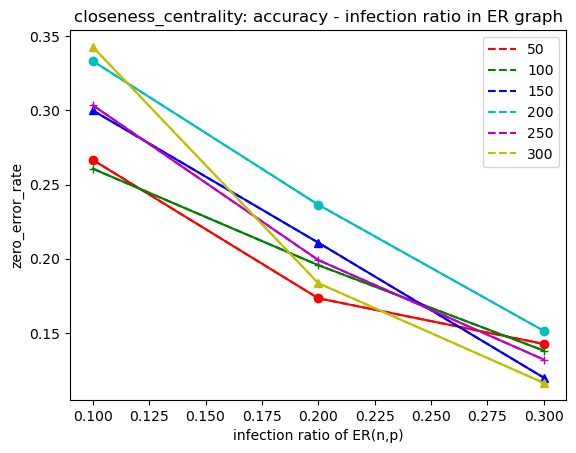

In [60]:
fig=plt.figure()
for i in range(len(n_list)):
    plt.plot(target_infected_ratio_list,all_results[graph_type_to_test[0]][centrality_type_to_test[2]]["zero_error_rate"][i,0,:],fmt_list[i],label=str(n_list[i]))
    plt.plot(target_infected_ratio_list,all_results[graph_type_to_test[0]][centrality_type_to_test[2]]["zero_error_rate"][i,0,:],point_fmt_list[i])
plt.title(centrality_type_to_test[2]+ ': accuracy - infection ratio ' + 'in ER graph')
# plt.text(0.02,0.3,'')
plt.xlabel('infection ratio of ER(n,p)')
plt.ylabel('zero_error_rate')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2e0cfccc-3e72-4ffe-b41f-68fb9b08eb08' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>